In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [2]:
iris = load_iris()

iris_target_names = list(map(lambda x: "_".join(x.split(" ")[: -1]), iris.feature_names))

iris_df = pd.DataFrame(iris.data, columns=iris_target_names)
iris_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
iris_df["target"] = iris.target
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# eps : 입실론 거리 (해당 거리 안에 min_samples 갯수가 있으면 핵심 포인트로 선정)
# min_samples : 핵심 포인트가 되기 위한 데이터의 최소 갯수

# dbscan (density-based spatial clustering of applicarions with noise)
# 밀집 지역 (dense region)의 포인트를 찾아서 클러스터 분류
# 데이터가 얼마나 모여있는지를 기준으로 분류하는 것은 mean_shift와 같음 (내부적으로 다르게 계산)

model = DBSCAN()
predict = model.fit_predict(iris.data)
iris_df["predict"] = predict
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [7]:
iris_df.groupby(["target", "predict"])["sepal_length"].count()

# 특별히 k를 넣어주지 않아도 특성 안에서 특징들을 가지고 알아서 맞게 그룹화 함
# -1, 1, 0 이렇게 3개로 구분한 것이 아님
# -1 : noise라는 의미
# 실제로는 붓꽃의 종류를 2개로 구분하고 있음

target  predict
0       -1          1
         0         49
1       -1          6
         1         44
2       -1         10
         1         40
Name: sepal_length, dtype: int64

In [8]:
iris_pca = PCA(n_components=2).fit_transform(iris.data)
iris_df["pca_1"] = iris_pca[:, 0]
iris_df["pca_2"] = iris_pca[:, 1]
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,predict,pca_1,pca_2
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,1,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,1,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,1,1.900942,0.116628


<Axes: xlabel='pca_1', ylabel='pca_2'>

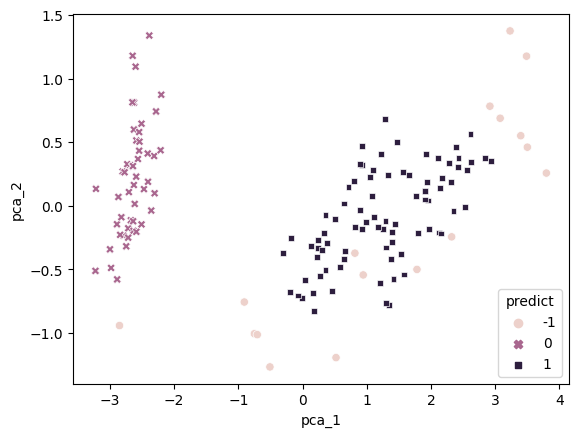

In [11]:
sns.scatterplot(data=iris_df, x="pca_1", y="pca_2", hue="predict", style="predict")

# 주성분 2개를 비교
# -1 은 이상치로 보고 나머지 2개로만 나눔